# Implementation des Réseaux de Neurone Artificiel

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

## Création du Dataset

dimension de X:(100, 2)
dimension de y:(100, 1)


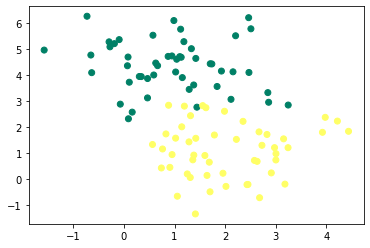

In [75]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = y.reshape((y.shape[0], 1))
               
print(f'dimension de X:{X.shape}')
print(f'dimension de y:{y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer');

## Création de la fonction d'initialisation
![image](84.png)

In [76]:
def initialisation(x):
    w = np.random.randn(x.shape[1], 1)
    b = np.random.randn(1)
    return (w, b)

## Testons la Fonction d'Initialisation

In [77]:
w, b = initialisation(X)
print(f'La taille de w: {w.shape}')
print(f'La taille de b: {b.shape}')

print(f'w: {w}\nb:{b}')

La taille de w: (2, 1)
La taille de b: (1,)
w: [[-0.83807659]
 [-0.74310966]]
b:[-0.38307103]


## Création du Modèle
![image](model.png)

### Création de la Fonction Sigmoïd

In [78]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [79]:
def model(x, w, b):
    Z = x.dot(w) + b
    A = sigmoid(Z)
    return A

## Testons le Modèle

In [80]:
A = model(X, w, b)
print(f'Shape de A: {A.shape}')

Shape de A: (100, 1)


## La Fonction Coût de Notre Modèle
![image](fonction_cout.png)

In [100]:
def log_loss(A, y):
    L = (1/len(y)) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))
    return L

In [101]:
loss = log_loss(A, y)

In [102]:
loss

1.5071607021568754

## Les Gradients de Notre Modèle
![image](gradients.png)

In [103]:
def gradients(X, A, y):
    dw = (1 / len(y)) * np.dot(X.T, (A-y))
    db = (1 / len(y)) * np.sum( A - y )
    
    return (dw, db)

## Testons les Gradients

In [104]:
dw, db = gradients(X, A, y)
print(f'Shape de dw: {dw.shape}\ndb: {db}')

Shape de dw: (2, 1)
db: -0.4499216080337724


In [105]:
dw

array([[-0.95515367],
       [-0.4948803 ]])

## Mise à Jour des Gradients

![image](update.png)

In [106]:
def update(dw, db, w, b, learning_rate):
    w = w + learning_rate * dw
    b = b + learning_rate * db
    return (w, b)

## Testons la Mise à Jour des Gradients

In [107]:
update(dw, db, w, b, 0.05)

(array([[-0.88583427],
        [-0.76785368]]),
 array([-0.40556711]))

## Entrainement du Modèle
![image](train_cnn.png)

In [115]:
def train_custom_cnn(X, y, learning = 0.01, epoch=100):
    # Initialisation des paramètres
    w, b = initialisation(X)
    
    ## Les erreurs
    loss = []
    # nombre d'iteration pour l'apprentissage
    for i in range(epoch):
        
        # Foward propagation
        A = model(X, w, b)
        
        # Les pertes et la fonction coût
        loss.append(log_loss(A, y))
        
        # Le calcul des gradients
        dw, db = gradients(A, X, y)
        
        # Mise à des erreurs pour ameliorer les performance du modèle
        w, b = update(dw, db, w, b, learning)
        
    return loss

## Testons Notre Modèle

In [122]:
erreur = train_custom_cnn(X, y, learning=0.01)

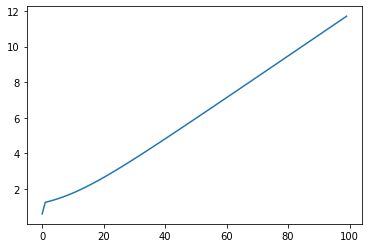

In [123]:
plt.plot(erreur)